In [1]:
# imports
import market_status as ms
from IPython.display import display, Markdown, Javascript, display_html
import pandas as pd
import datetime as dt
import os
import time

***
# **Market Status Notebook**
This notebook aims to provide comprehensive status of the market, which direction its heading and which sector is stronger than the other. All required code is written in python script ```market_status.py``` to save space. All days used in this notebook are meant as **trading** days.

**Stuff to implement**
- Options status for major indices
- Distribution days for indices (based on the "How to Make Money in Stocks" book)
- ~~Add Nasdaq to indices overview (remove double stochastic, keep only VFI)~~
- Recent IPOs (use finviz screener) with basic stats (IPO date, industry)
- Crypto status (only the big ones compared to USD = BTC, ETH, další?)
- Add small cheatsheet what to look for with each notebook section

**Basic information** 
<br>
Market is open every weekday from 09:30 to 16:00 EST (15:30 to 22:00 CET)
<br>
Holidays (when market is closed)
<table>
<thead>
<tr>
<th>Date</th>
<th>Weekday</th>
<th>Note</th>
</tr>
</thead>
<tbody>
<tr>
<td>24/12/2021</td>
<td>Friday</td>
<td>-</td>
</tr>
<tr>
<td>17/01/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>21/02/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>15/04/2022</td>
<td>Friday</td>
<td>-</td>
</tr>
<tr>
<td>30/05/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>20/06/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>04/07/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>05/09/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>24/11/2022</td>
<td>Thursday</td>
<td>Closes at 13:00</td>
</tr>
<tr>
<td>26/12/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
</tbody>
</table>


## **World Markets**

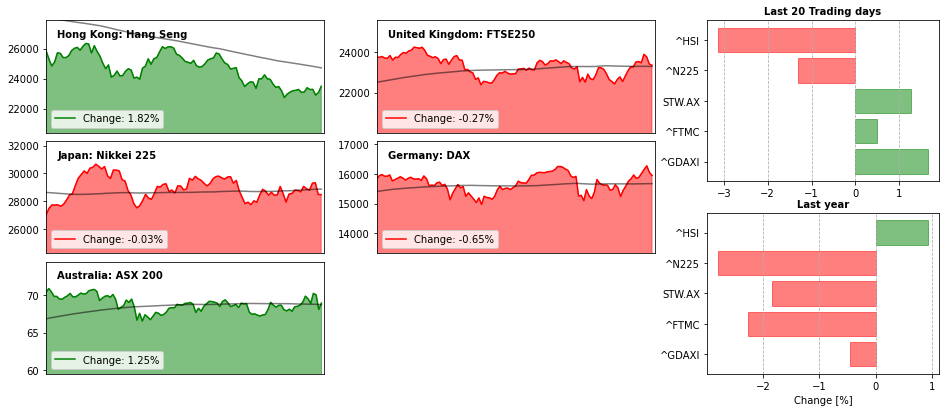

In [2]:
ms.worldmarkets()

***
## **US markets**
Spy = ETF following S&P500, IWM = ETF following Russell 2000
<br>
Follow the price action. How is the price and volume evolving? Any clear support or resistance soon? How is the new highs/new lows indicator acting compared to the overall market?

Last update done: 08-01-2022 at 12:17:20


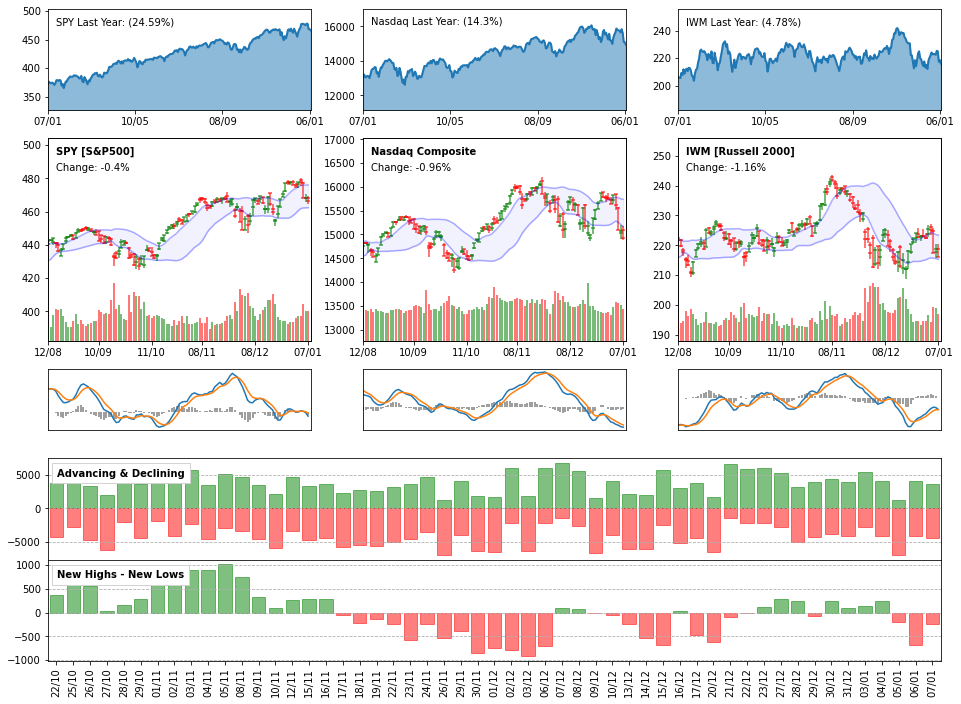

In [3]:
ms.usmarkets()

***
## **Sectors**
Explanations:
- Consumer Discretionary (cyclical) = goods and services that are considered non-essential by consumers, but desirable
- Consumer Staples (non-cyclical, defensive) = set of essential products used by consumers. This category includes things like foods and beverages, household goods, and hygiene products as well as alcohol and tobacco. 

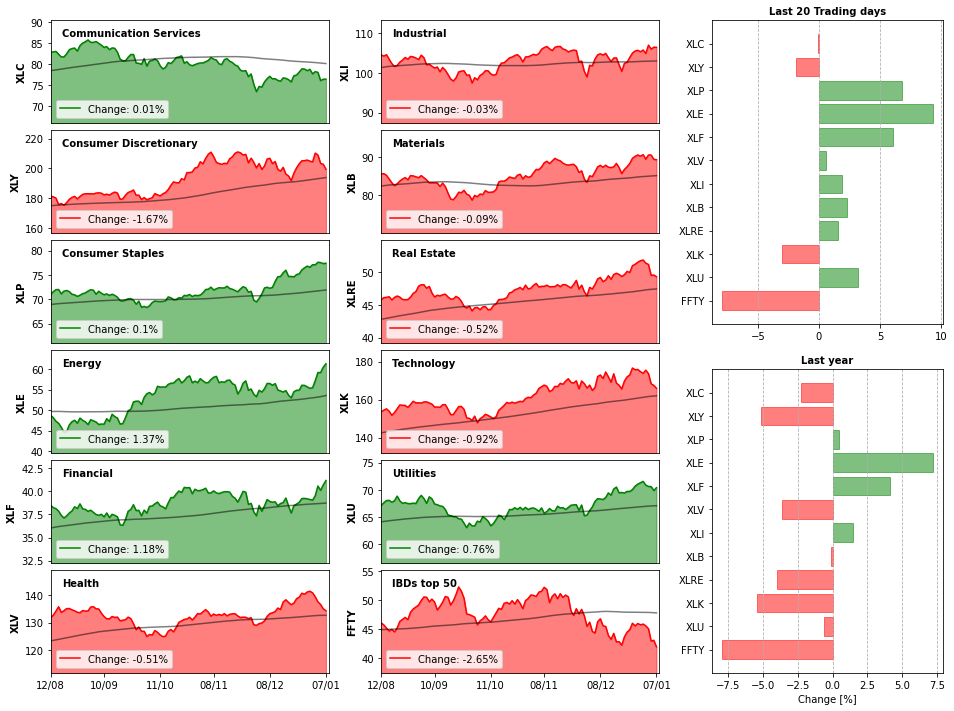

In [4]:
ms.sectors()

### Industries
Following tables are 20 best performing industries in last month followed by 10 worst performing indistries. Both tables are sorted by descending performance over last month.
<br>
Any industry shows relative strength compared to rest of the market? This could be potential winner for next cycle.

In [5]:
ind = ms.industries(sf=False, rank=True)
display_html(ind.prettify(ind.table.iloc[:20,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
Oil & Gas Drilling,14.22,14.68,-1.84,39.32,0.53,0.33,1.00
Coking Coal,1.62,12.68,59.44,74.58,0.37,0.97,-1.00
Insurance - Diversified,6.45,11.75,14.41,36.05,1.51,1.74,10.00
Aluminum,3.60,10.80,12.02,62.10,0.86,5.09,1.00
Other Industrial Metals & Mining,6.31,10.52,-12.88,-7.54,0.99,3.58,4.00
Pharmaceutical Retailers,2.90,10.04,10.00,15.54,0.55,2.61,-2.00
Confectioners,1.65,9.48,8.33,19.70,0.97,0.09,4.00
Tobacco,4.26,9.47,-0.18,0.96,0.75,1.35,12.00
Medical Distribution,1.31,9.38,13.96,20.62,1.11,2.06,-2.00
Oil & Gas Equipment & Services,12.79,9.07,6.23,23.58,0.84,1.56,4.00


In [6]:
display_html(ind.prettify(ind.table.iloc[-10:,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
Residential Construction,-10.71,-9.87,7.05,39.46,1.63,-5.17,-23.00
Pollution & Treatment Controls,-7.22,-10.60,-3.74,11.02,0.40,-3.51,-13.00
Gambling,-2.73,-10.90,-24.71,-26.10,1.22,2.70,5.00
Apparel Manufacturing,-4.27,-11.17,-11.41,3.10,1.02,-1.97,-1.00
Health Information Services,-8.84,-12.00,-26.92,-30.43,1.22,-2.04,-8.00
Biotechnology,-9.62,-13.61,-20.10,-23.28,0.63,-1.21,-2.00
Software - Application,-10.76,-14.30,-11.98,-10.77,0.89,-1.06,-1.00
Electrical Equipment & Parts,-7.27,-14.70,-7.58,-16.58,0.53,-1.93,-1.00
Electronic Gaming & Multimedia,-11.59,-19.65,-28.77,-22.62,1.14,-1.74,0.00
Solar,-12.26,-26.85,-24.15,-42.18,0.89,-0.50,0.00


***
## **Futures**
Selected commodities futures. 
Will add also column for a relative year performance, but currently scrapper has a problem that the ethanol returns Null value.

In [7]:
futures = ms.futures()
data_futures = futures.returnfutures()
display_html(futures.prettify(data_futures.iloc[:12,:])._repr_html_()+"\xa0\xa0\xa0"+futures.prettify(data_futures.iloc[12:,:])._repr_html_(), raw=True)

,Day [%],Week [%],Month [%],Quarter [%]
Natural Gas,3.23,5.50,6.12,-30.69
Crude Oil WTI,-0.65,4.96,9.56,0.82
Crude Oil Brent,-0.07,5.34,8.60,-0.02
Ethanol,2.78,3.88,-10.48,-4.72
Palladium,3.15,1.09,4.66,-1.13
Copper,1.07,-1.40,1.42,3.71
Platinum,-0.25,-0.82,0.87,-2.74
Silver,0.88,-4.14,-0.61,-1.20
Gold,0.41,-1.76,0.66,2.12
Lumber,0.21,6.89,28.68,80.52


***
## **Crypto**

In [8]:
# outptut table with cryptos and their preformance in last day/week/month

***
## **Finviz screeners**
Following tables are results from pre-defined finviz screeners
<br><br>
**New high Breakouts** - [[Link]](https://finviz.com/screener.ashx?v=211&s=ta_newhigh&f=ind_stocksonly,sh_avgvol_o100,sh_float_o5,sh_relvol_o1)
<br>
Stocks with new 52 week highs, with float over 5M shares, average volume 100k and relative volume over 1. 

In [9]:
screeners = ms.screeners()
nh = screeners.newhighs()
screeners.prettify(nh)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
HGSH,AEG,RELL,SGML,LBAI,BPOP,AMPH,UVE,FBP,ESTE,BY,STT,NPO,LQDA,CUBI
EGBN,PGR,PFS,MTB,CIO,BNS,LKFN,DOV,LPLA,NTRS,OFG,UBS,ISBC,BUSE,RF
KEY,TXT,NWG,TM,EOG,DG,BXP,LYG,CUZ,DVN,CHD,ASB,PNFP,WFC,COP
HSBC,CVX,FCF,EPC,SBNY,SCHW,BRK-B,POR,RJF,CNQ,VET,PNC,CMA,PEG,IMO
BAC,BK,FITB,TRV,RY,L,HBAN,AFL,KR,CM,CPF,PRU,XOM,HWC,FNF
BANR,PBCT,CB,MET,RUSHA,SO,SJM,PFG,ZION,LAUR,CHK,BMO,CFG,MPC,


**50 day high with fundamentals** - [[Link]](https://finviz.com/screener.ashx?v=211&f=fa_debteq_u1,fa_eps5years_o10,fa_sales5years_o10,ind_stocksonly,sh_avgvol_o100,sh_float_o5,sh_relvol_o1,ta_highlow50d_nh)
<br>
Stocks which have 50 day highs with higher relative volume and basic fundamental filtration (dept/equity <1, sales and EPS growth in last 5 years larger than 10%)

In [10]:
fd = screeners.fiftyday()
screeners.prettify(fd)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
ESTE,BGS,PGR,DG,CHD,WAL,SACH,,,,,,,,


In [11]:
# save the screener results into xlsx
with pd.ExcelWriter("Data/Screeners/NH"+str(dt.date.today().strftime("%Y-%m"))+".xlsx", mode="a") as writer:
    nh.to_excel(writer, sheet_name=dt.date.today().strftime("%Y-%m-%d"))
with pd.ExcelWriter("Data/Screeners/FD"+str(dt.date.today().strftime("%Y-%m"))+".xlsx", mode="a") as writer:
    fd.to_excel(writer, sheet_name=dt.date.today().strftime("%Y-%m-%d"))

***
## **New IPOs**
New companies on the market during the last month, look for interesting price changes or so

---
## **Other resources**

List of other good resources to check (these will be hopefully implemented into this notebook later)

1. [Market momentum](https://www.barchart.com/stocks/momentum) - Watch for the number of stocks which are declining and advancing and overall number of new highs/new lows
2. [SPY p/c ratio](https://www.barchart.com/etfs-funds/quotes/SPY/put-call-ratios) - P/C ratio >1 = bearish


In [12]:
os.system("jupyter nbconvert --to html --template classic market_status.ipynb")

1